# Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

from math import sqrt
from sklearn.metrics import mean_squared_error
from itertools import product
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings(action="ignore")

## Reading data

In [75]:
data = pd.read_csv("Sparkling.csv",parse_dates=[0],infer_datetime_format=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Sparkling  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [77]:
data.head()

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


## Plotting Data

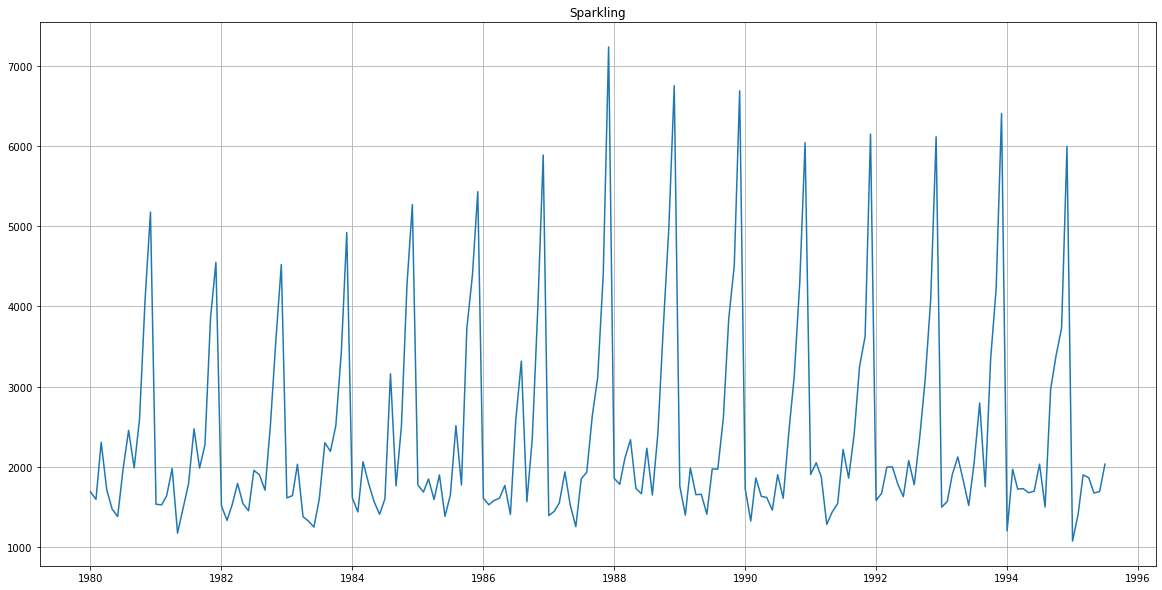

In [78]:
plt.figure(figsize=(20,10))
plt.title("Sparkling")
plt.plot(data.YearMonth ,data.Sparkling)
plt.grid(True)
plt.show()

In [79]:
data.dropna(inplace=True)

In [80]:
data.index=data.YearMonth

## Exploratory Data Analysis

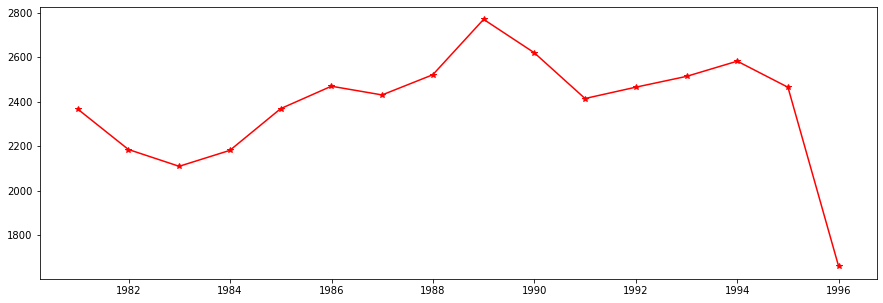

In [81]:
#Plotting mean of every year
plt.figure(figsize=(15,5))
yearMean = data.Sparkling.resample('Y').mean() 
plt.plot(yearMean,'r*-')
plt.show()

In [82]:
#Plotting boxplot of data
px.box(data.Sparkling,x =data.index.year,y='Sparkling',notched=True,title='Boxplot of every year')

#### Moving average

In [83]:
def plot_avg(time_series,window_size,index):
    rolling_mean = time_series.rolling(window=window_size).mean()
    plt.figure(figsize=(20,10))
    
    plt.title('Moving average\n window size = {}'.format(window_size))
    plt.plot(index,rolling_mean, 'g', label='Rolling mean trend')
    
    plt.plot(index,time_series, label='Actual values')
    plt.legend(loc='best')
    
    plt.grid(True)

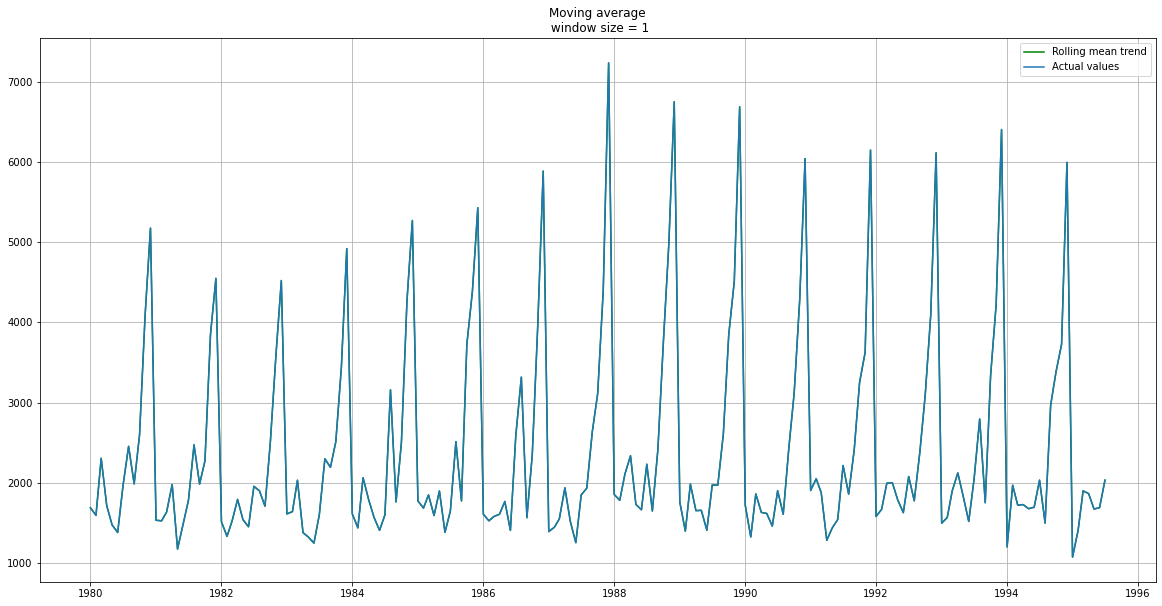

In [84]:
#Monthly data smoothing
plot_avg(data.Sparkling,1,data.YearMonth)

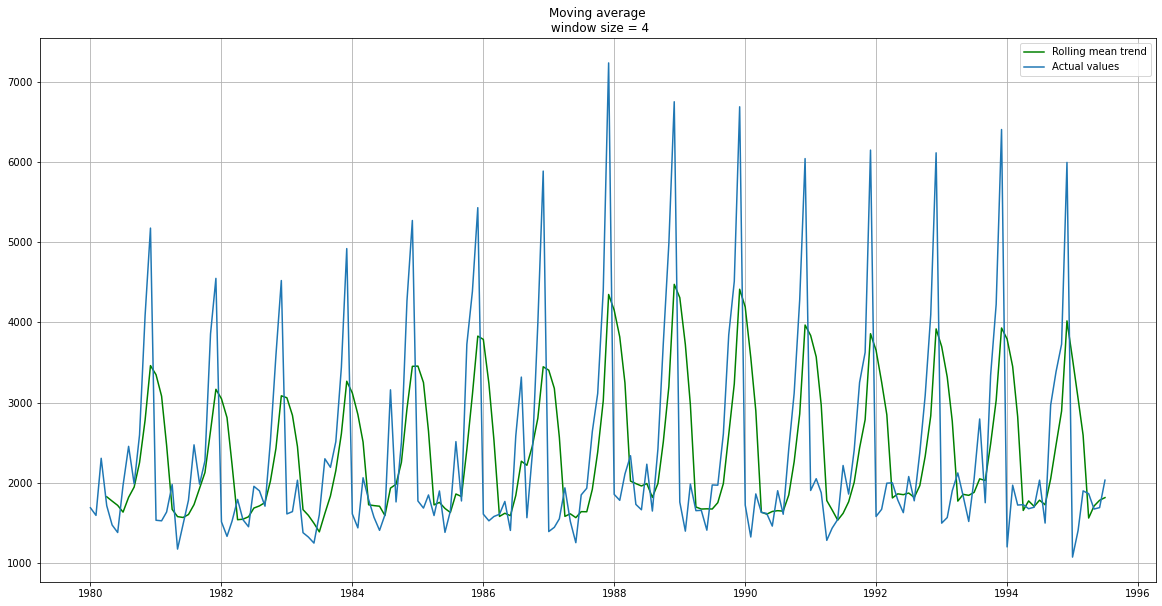

In [85]:
#Quaterly data smoothing
plot_avg(data.Sparkling,4,data.YearMonth)

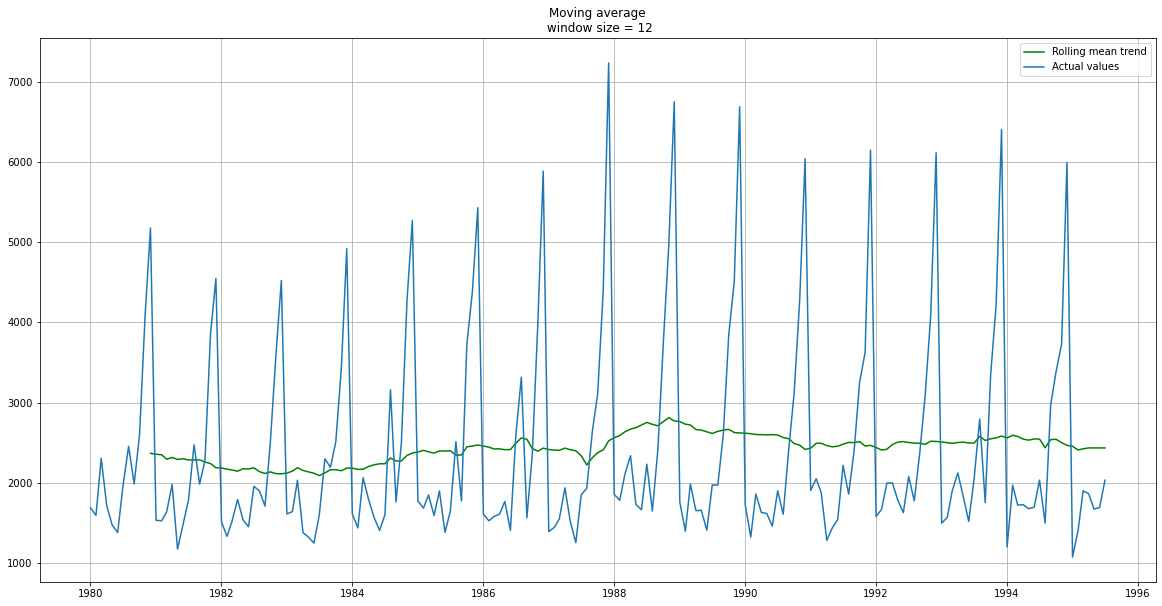

In [86]:
#Yearly data smoothing
plot_avg(data.Sparkling,12,data.YearMonth)

#### Exponential Smoothing

In [87]:
def exponential_smoothing(time_series, alpha):

    exp_smooth = [time_series[0]]
    for n in range(1, len(time_series)):
        exp_smooth.append(alpha * time_series[n] + (1 - alpha) * exp_smooth[n-1])
    return exp_smooth
  
def plot_exponential_smoothing(time_series, alphas,index):
 
    plt.figure(figsize=(20,10))
    for alpha in alphas:
        plt.plot(index,exponential_smoothing(time_series, alpha), label="Alpha {}".format(alpha))
    plt.plot(index,time_series, "c", label = "Actual")
    plt.legend(loc="best")
    
    plt.title("Exponential Smoothing")
    plt.grid(True);

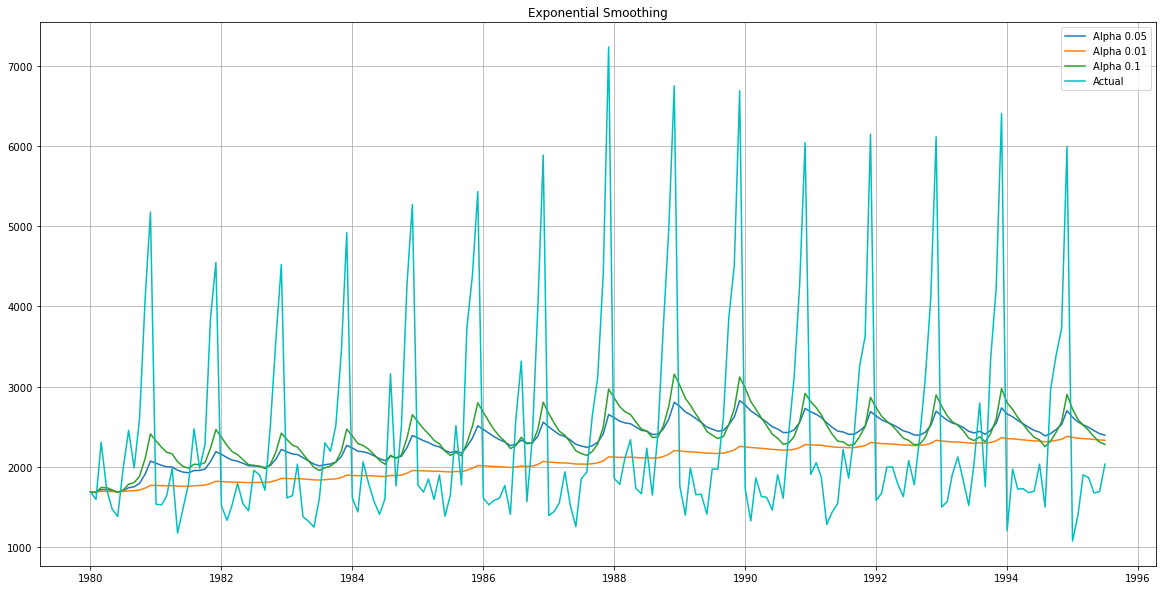

In [88]:
plot_exponential_smoothing(data.Sparkling.values, [0.05, 0.01,0.1],data.YearMonth )

#### Double Exponential smoothing

In [89]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    

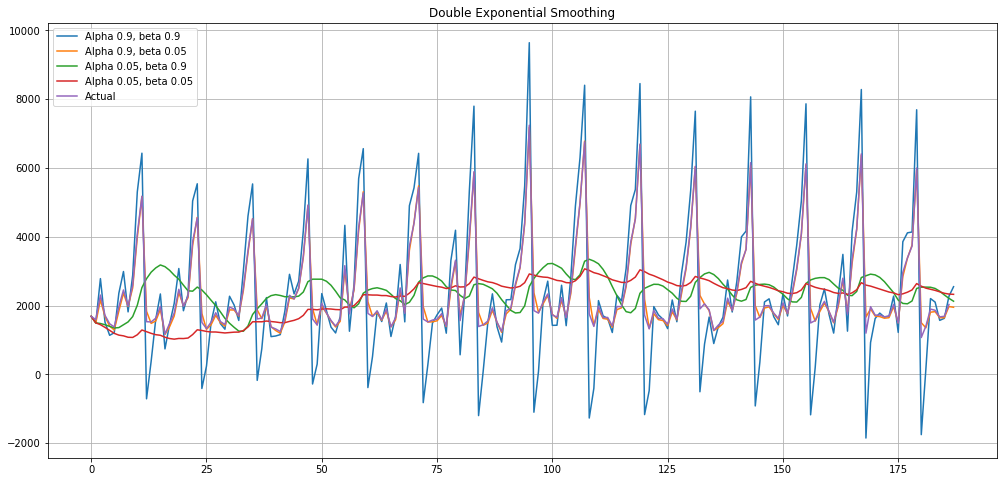

In [90]:
plot_double_exponential_smoothing(data.Sparkling.values, alphas=[0.9, 0.05], betas=[0.9, 0.05])

#### Stationary Check

In [91]:
def stationary(y, index,lags=None):
    
    fig = plt.figure(figsize=(12, 7))
    layout = (2,2)
    
    org = plt.subplot2grid(layout, (0,0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))

    org.plot(index,y)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    org.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}, alpha=0.05'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
        

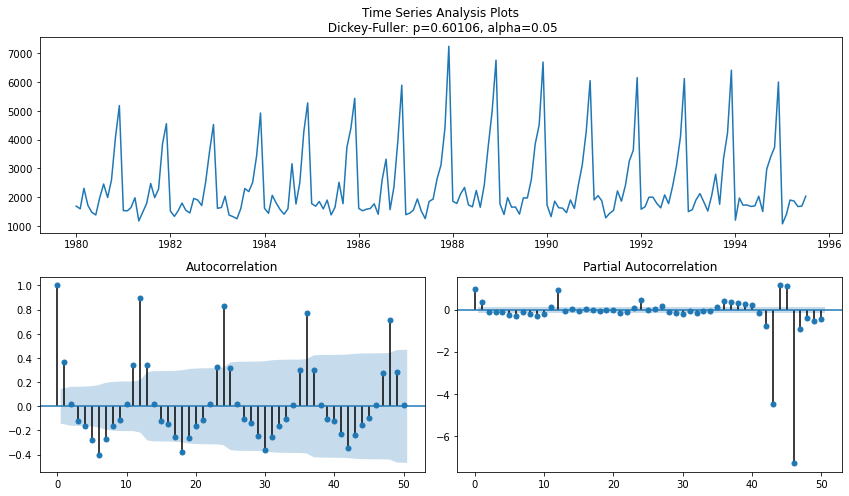

In [92]:
stationary(data.Sparkling,data.YearMonth, lags=50)

In [93]:
result = adfuller(data.Sparkling)

In [94]:
print("Statistics: ",result)
print("\n Data is Stationary")

Statistics:  (-1.3604974548123379, 0.6010608871634849, 11, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, 2573.1222090270685)

 Data is Stationary


## Splitting Data


In [95]:
#Split data at year 1991
train = data.Sparkling[data.index<'1991']
test = data.Sparkling[data.index>='1991']

train,test = train.astype('double'),test.astype('double')

In [96]:
print('First 5 rows of the Training data')
display(train.head())
print('Last 5 rows of the training data')
display(train.tail())
print('First 5 rows of the test  data')
display(test.head())
print('Last 5 rows of the test data')
display(test.tail())

First 5 rows of the Training data


YearMonth
1980-01-01    1686.0
1980-02-01    1591.0
1980-03-01    2304.0
1980-04-01    1712.0
1980-05-01    1471.0
Name: Sparkling, dtype: float64

Last 5 rows of the training data


YearMonth
1990-08-01    1605.0
1990-09-01    2424.0
1990-10-01    3116.0
1990-11-01    4286.0
1990-12-01    6047.0
Name: Sparkling, dtype: float64

First 5 rows of the test  data


YearMonth
1991-01-01    1902.0
1991-02-01    2049.0
1991-03-01    1874.0
1991-04-01    1279.0
1991-05-01    1432.0
Name: Sparkling, dtype: float64

Last 5 rows of the test data


YearMonth
1995-03-01    1897.0
1995-04-01    1862.0
1995-05-01    1670.0
1995-06-01    1688.0
1995-07-01    2031.0
Name: Sparkling, dtype: float64

## SARIMA

In [97]:
data.drop('YearMonth',axis=1,inplace=True)

In [98]:
#Intializing some values
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Creating list of all possible combionation
param_list = list(product(ps, range(0, 3), range(0, 3), range(0, 3)))


# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(data,parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        data = data on which to train
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table



In [99]:
result_table = optimize_SARIMA(train,param_list,d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(train, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

  0%|          | 0/135 [00:00<?, ?it/s]

                                 Statespace Model Results                                
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(0, 1, 2, 5)   Log Likelihood               -1070.270
Date:                           Mon, 11 Jan 2021   AIC                           2156.540
Time:                                   02:37:11   BIC                           2179.230
Sample:                               01-01-1980   HQIC                          2165.758
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2562      0.141      8.897      0.000       0.979       1.533
ar.L2         -0.4694      0.285     -1.648

In [100]:
pred_train = best_model.fittedvalues
pred_test = best_model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

In [101]:
rmse_ar = sqrt(mean_squared_error(test,pred_test))

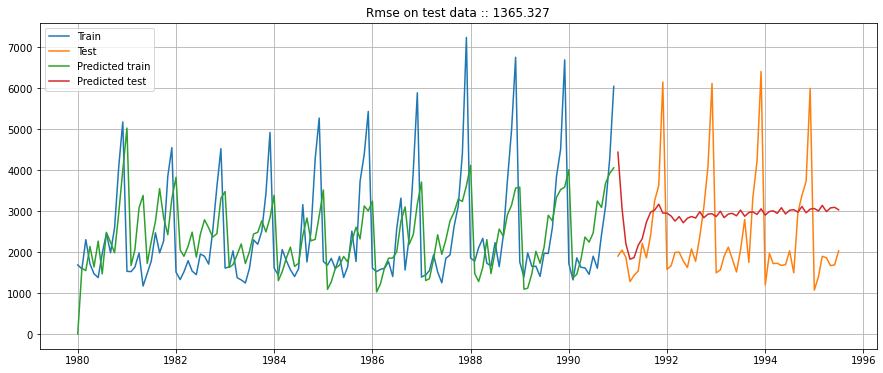

In [102]:
## Plotting on both the training and test data set
plt.figure(figsize=(15,6))
plt.title('Rmse on test data :: {}'.format('%.3f'%rmse_ar))
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(pred_train,label='Predicted train')
plt.plot(pred_test,label='Predicted test')
plt.legend(loc='best')
plt.grid();

## Prediction In Future

In [103]:
future_data = best_model.predict(start=len(data),end=len(data)+12,dynamic=False)

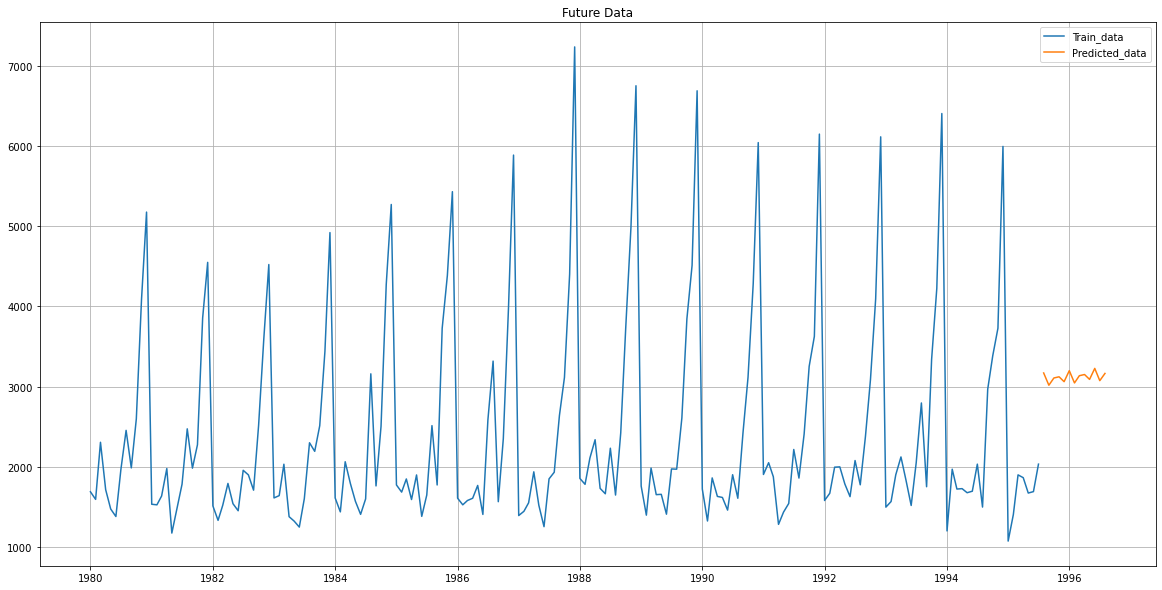

In [104]:
plt.figure(figsize=(20,10))
plt.title("Future Data")
plt.plot(data,label='Train_data')
plt.plot(future_data,label='Predicted_data')
plt.legend(loc='best')
plt.grid(True)
plt.show()